Nome: Marco Antônio Ribeiro de Toledo

RA: 11796419

In [1]:
# Imports gerais

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.neural_network import MLPRegressor

from typing import Tuple, Dict, List

In [2]:
# Constantes
DATADIR = "./"

# Questão 1

## 1a)

Carrega os dados a partir do CSV e exibe suas primeiras entradas:

In [3]:
_dfHour = pd.read_csv(DATADIR + "hour.csv")
_dfHour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1b)
A variável resposta é a da coluna `cnt`, que indica o número total de bikes alugadas (`casual` + `registered`)


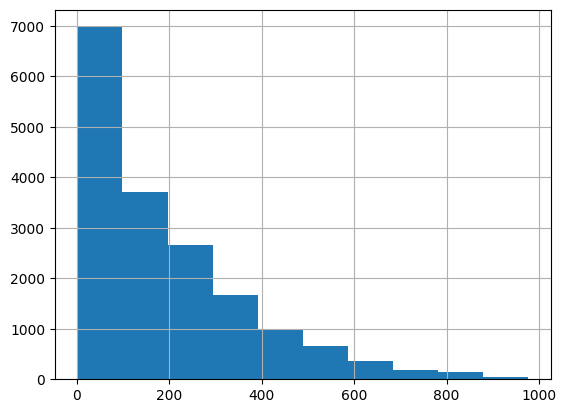

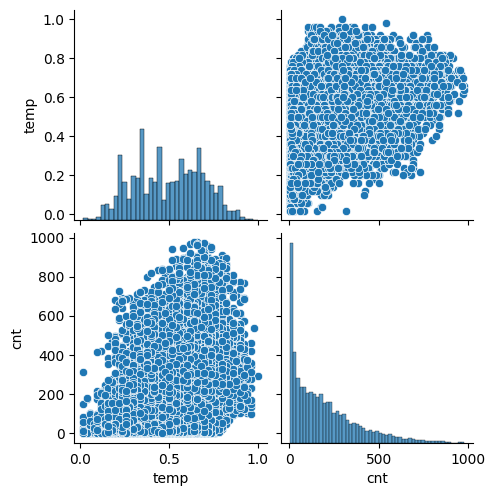

In [4]:
_dfHour['cnt'].hist()
yColumns = [ 'cnt' ]
plt.show()

sns.pairplot(_dfHour[['temp', 'cnt']])
plt.show()

# Questão 2

## 2a)
Do total de colunas:

In [5]:
", ".join(_dfHour.columns)

'instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt'

Temos como colunas explicativas:
- season
- holiday
- weekday
- workingday
- weathersit
- temp
- atemp
- hum
- windspeedt


In [6]:
# Registramos essa como as colunas para uso em X
XColumns = ["season", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]

## 2b)

Temos as variáveis `casual` e `registered`, que indicam em conjunto a variável resposta, porém não são a resposta por si só.

## 2c)
Temos como metadados as colunas

- instant
- dteday

que dizem respeito a data/hora da amostra.

# Questão 3

## 3a)

In [7]:
# Lê todas as entradas do ano 0 (2011)
Train = _dfHour[_dfHour['yr'] == 0]
# Divide `X` e `y` com base nas colunas definidas
XTrain, yTrain = Train[XColumns], Train[yColumns]
# Transforma `y` em um array esperado pelo sklearn
yTrain = np.array(yTrain).reshape((-1, ))

# Lê todas as entradas do ano 1 (2012)
Test = _dfHour[_dfHour['yr'] == 1]
XTest, yTest = Test[XColumns], Test[yColumns]
yTest = np.array(yTest).reshape((-1, ))

## 3b)
Temos como variáveis qualitativas `season` (com valores em [1, 2, 3, 4], indicando a estação), `weathersit` (com valores em [1, 2, 3, 4], indicando o clima do dia) e `weekday` (que indica o dia da semana em [0, 1, 2, 3, 4, 5, 6]).

In [8]:
# Variáveis a serem transformadas
QUALI = ['season', 'weathersit', 'weekday']

# Transformador
transformerTrain = make_column_transformer(
    (OneHotEncoder(), QUALI),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

# Transforma os dados e sobrescreve a base de dados
trainTransformed = transformerTrain.fit_transform(XTrain)
XTrain = pd.DataFrame(trainTransformed, columns=transformerTrain.get_feature_names_out())

transformerTest = make_column_transformer(
    (OneHotEncoder(), QUALI),
    remainder='passthrough',
    verbose_feature_names_out=False,
)
testTransformed = transformerTest.fit_transform(XTest)
XTest = pd.DataFrame(testTransformed, columns=transformerTest.get_feature_names_out())

In [9]:
# DataFrame com encoder e tipos categóricos
XTrain = XTrain.astype({
    "season_1": 'category',
    "season_2": "category",
    "season_3": "category",
    "season_4": "category",
    "weathersit_1": "category",
    "weathersit_2": "category",
    "weathersit_3": "category",
    "weathersit_4": "category",
    "weekday_0": "category",
    "weekday_1": "category",
    "weekday_2": "category",
    "weekday_3": "category",
    "weekday_4": "category",
    "weekday_5": "category",
    "weekday_6": "category",
})
XTrain

,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,weekday_0,weekday_1,...,weekday_3,weekday_4,weekday_5,weekday_6,holiday,workingday,temp,atemp,hum,windspeed
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.24,0.2879,0.81,0.0000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.22,0.2727,0.80,0.0000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.22,0.2727,0.80,0.0000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.24,0.2879,0.75,0.0000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.42,0.4242,0.54,0.2239
8641,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.42,0.4242,0.54,0.2239
8642,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.40,0.4091,0.58,0.1940
8643,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.3939,0.62,0.1343


In [10]:
# DataFrame com encoder e tipos categóricos
XTest = XTest.astype({
    "season_1": 'category',
    "season_2": "category",
    "season_3": "category",
    "season_4": "category",
    "weathersit_1": "category",
    "weathersit_2": "category",
    "weathersit_3": "category",
    "weathersit_4": "category",
    "weekday_0": "category",
    "weekday_1": "category",
    "weekday_2": "category",
    "weekday_3": "category",
    "weekday_4": "category",
    "weekday_5": "category",
    "weekday_6": "category",
})
XTest

,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,weekday_0,weekday_1,...,weekday_3,weekday_4,weekday_5,weekday_6,holiday,workingday,temp,atemp,hum,windspeed
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.3788,0.66,0.0000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.3485,0.66,0.1343
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.3485,0.76,0.0000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.3333,0.81,0.0000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.28,0.3030,0.81,0.0896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.26,0.2576,0.60,0.1642
8730,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.26,0.2576,0.60,0.1642
8731,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.26,0.2576,0.60,0.1642
8732,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.26,0.2727,0.56,0.1343


# Questão 4

Usamos a classe `MLPRegressor` para a regressão dos valores da base de dados. O código é feito de forma paralelizada por questões de performance.

In [14]:
import concurrent.futures
from sklearn.metrics import mean_absolute_error

# Iterações máximas para garantir convergência
MAX_ITERS = int(10e3)
# Lista de tamanhos
hiddenSizes: List[Tuple[int, int]] = [(), (10,), (10, 10,)]
# Lista de modelos a serem gerados
models: List[Tuple[Tuple[int, int], MLPRegressor]] = []

def createFitModel(size: Tuple[int, int]) -> Tuple[Tuple[int, int], MLPRegressor]:
    # Cria modelo com tamanho dado
    regr = MLPRegressor(
        hidden_layer_sizes=size,
        random_state=42,
        max_iter=MAX_ITERS,
        activation='relu',
        solver='adam',
        alpha=0.0,
        batch_size=10,
        tol=0.0001,
        nesterovs_momentum=False,
        learning_rate='constant',
        learning_rate_init=0.01,
        shuffle=True,
    )
    # Treina modelo
    regr.fit(XTrain, yTrain)
    # Retorna modelo e o tamanho deste
    return (size, regr)

# De forma paralelizada gera modelos para cada um dos tamanhos requeridos
with concurrent.futures.ThreadPoolExecutor() as executor:
    models = list(executor.map(createFitModel, hiddenSizes))

In [15]:
# Exibe tamanho e erro de cada modelo gerado
print("Modelos:")
for model in models:
    print(
        "\tModelo com camadas {} - MAE: {}".format(
            model[0],
            mean_absolute_error(model[1].predict(XTest), yTest)
        )
    )

Modelos:
	Modelo com camadas () - MAE: 139.88925919301428
	Modelo com camadas (10,) - MAE: 137.4178518829845
	Modelo com camadas (10, 10) - MAE: 138.31472523246063
